   Major League Baseball has been America’s sports pastime for over 100 years and was first founded in 1871 for the National League and 1901 for the American League.  Today, there are 15 teams in each league.  In the year 2000, the two leagues merged into what is now known as Major League Baseball (MLB).  Since the very beginning, statistics in baseball have played a major role in the game.  In today’s baseball, advanced metrics are being used by every major league team in order to gain advantage over their competition.  MLB organizations employ data science teams to collect this information for executives, general managers and coaches.  With today's big contracts to top performing players in MLB, it is important to make sure good decisions are made.
   
   Baseball contracts involve intense negotiations and millions of dollars are at stake.  Recently, the St. Louis Cardinals signed Paul Goldschmidt, agreeing to a five-year, $130 million contract.  Paul Goldschmidt is 31 years old.   Age plays a big role in a baseball players performance.  At some point as players get older, their performance on the field inevitably starts to decline.  I have wondered whether the Paul Goldschmidt deal was good for the St. Louis Cardinals, and some have said, according to Forbes Magazine, there is reason to believe he could be entering the decline phase of his career.   The Cardinals are betting that he will produce through the age of 37 years old.  What are the chances that Paul Goldschmidt will continue to perform until the age of 37? 
      
   The statistic OPS (on base plus slug) is widely considered one of the best evaluative tools for hitter performance.  Sean Layman has done a fantastic job at collecting raw data collected from 1871 to 2018 of major league baseball games.  All atomic data elements needed for the calculation of OPS (on base plus slug), OBP (on base percentage) and SLG (slugging) are available in this data. 
   
   After loading the data, data quality assessment was performed and this project uses data from 1954 to 2018.  Sacrafice Flies (SF) were not collected consistently prior to 1954.  So the raw data being used is from 1954 to 2018.  The following code initializes the baseball batting statistics data which was previously written to a file after data quality and wrangling was completed.


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
from pybaseball import batting_stats
import os.path
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#import seaborn as sns

MIN_AT_BATS = 0
START_YEAR = 1954
END_YEAR = 2018
START_DATE = datetime.strptime(str(START_YEAR)+'-01-01','%Y-%m-%d')
END_DATE = datetime.strptime(str(END_YEAR)+'-12-31','%Y-%m-%d')

# set path for reading Lahman baseball statistics
path = 'C:\\Users\\User\\Documents\\PAUL\\Springboard\\core\\'

#routine that calculates OPS, OBP and SLG and returns them to calling routine.
def calc_ops(df):    
    df['1B'] = df['H'] - ( df['2B'] + df['3B'] + df['HR'] )  
    df['TB'] =  df['1B'] + (df['2B'] * 2) + (df['3B'] * 3) + (df['HR'] * 4)                             
    df['SLG'] = df['TB'] / df['AB']
    df['OBP'] = ( df['H'] + df['BB'] + df['HBP'] ) / ( df['AB'] + df['BB'] + df['SF'] + df['HBP'] )                 
    df['OPS'] = df['OBP'] + df['SLG'] 
    return  df

battingf = path + 'dfbatting_player_stats.csv'
dfbatting_player_stats = pd.read_csv(battingf,parse_dates=['debut','finalGame','birthdate'])


dfbatting_player_stats = dfbatting_player_stats[(dfbatting_player_stats['debut'] >= START_DATE) &
                                                (dfbatting_player_stats['finalGame'] <= END_DATE)]

The following visualizations show the total player population for this project from 1954 to 2019



Total Population of Players from 1954 to 2018: 5113


Total # of Observations (yearly player statistics) 1954 to 2018: 32487




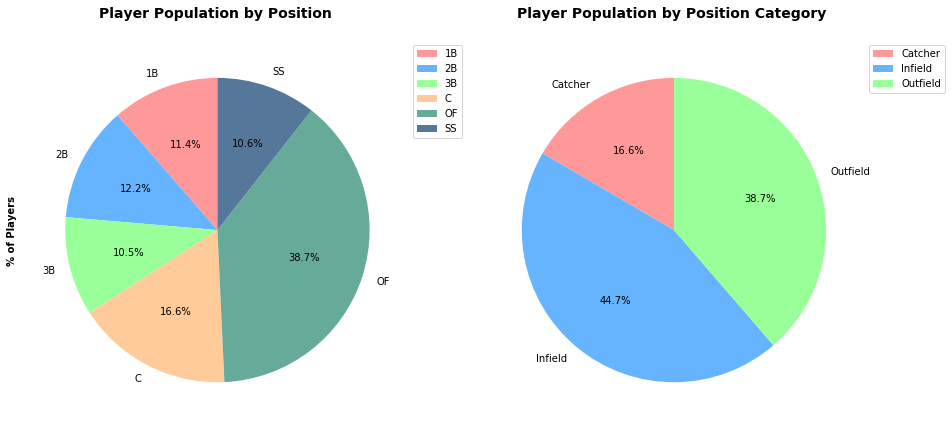

In [11]:
dfbatting_ages = dfbatting_player_stats.groupby(['yearID','age']).count()['playerID']
dfbatting_ages = dfbatting_ages.reset_index()
dfbatting_ages.columns = ['yearID','age','agecount']

# add decade for better reporting
dfbatting_player_stats['decade'] = (dfbatting_player_stats['yearID'] // 10)*10
df = dfbatting_player_stats
# total number of players in population
dfbatting_playercnt = df.groupby(['yearID']).count()['age']
dfplayers_unique = df.playerID.unique()
print('\n')
print('Total Population of Players from 1954 to 2018: ' + str(len(dfplayers_unique)))
print('\n')
print('Total # of Observations (yearly player statistics) 1954 to 2018: ' + str( len(dfbatting_player_stats) ) )
print('\n')

# set size information and layout for subplots
fig, axx = plt.subplots(nrows=1, ncols=2,)
fig.set_size_inches(15,7)
# players by position in population
dfplot1 = df[['playerID','POS']].drop_duplicates().groupby('POS').count()
dfplot1 = dfplot1.reset_index()
dfplot1.columns = ['Position','PositionCounts']
ax = dfplot1.plot(kind='pie',y='PositionCounts',labels=dfplot1['Position'],ax=axx[0],startangle=90,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('Player Population by Position \n', weight='bold', size=14)
ax.set_ylabel("% of Players", labelpad=10, weight='bold', size=10)
ax.legend(bbox_to_anchor=(1, 1))

# players by position category
dfplot2 = df[['playerID','POS_Cat']].drop_duplicates().groupby('POS_Cat').count()
dfplot2 = dfplot2.reset_index()
dfplot2.columns = ['PositionCat','PositionCatCounts']
ax2 = dfplot2.plot(kind='pie',y='PositionCatCounts',labels=dfplot2['PositionCat'],ax=axx[1],startangle=90,autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99'])
ax2.set_title('Player Population by Position Category \n', weight='bold', size=14)
ax2.set_ylabel(None, labelpad=10, weight='bold', size=10)
ax2.legend(bbox_to_anchor=(1, 1))
plt.show()
print('\n\n')

The next set of visualizations show statistics on player counts by age and years played.  The final visualizations give player counts by decade including totals, by position (1B, 2B, 3B, SS, Outfield and Catcher) and by positon category (Infield, Outfield and Catcher).  Note this is the total player counts summed over all years from 1954 to 2018.  So, players will be counted multiple times for each year they played which is the desired outcome.  Each observation is a yearly observation for each player.

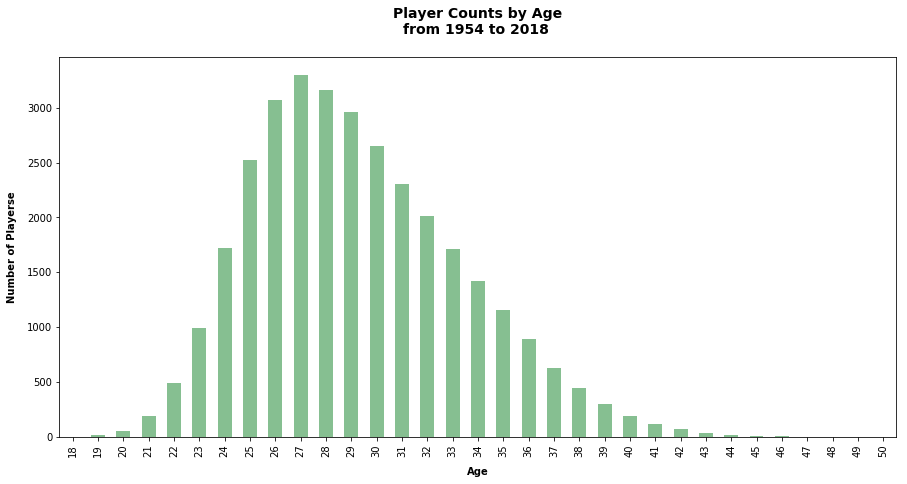

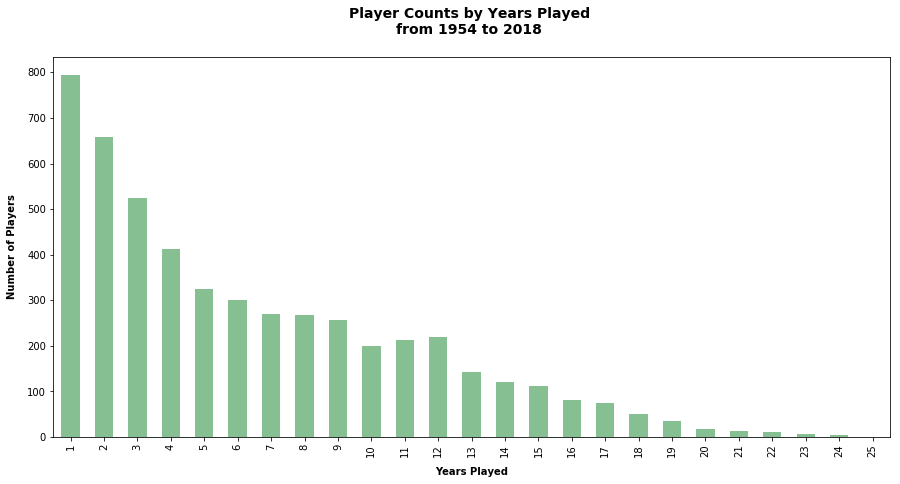

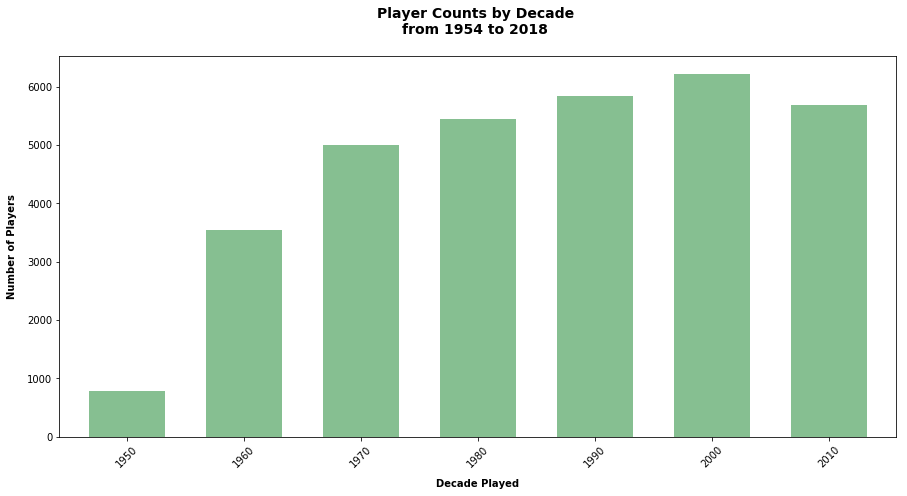

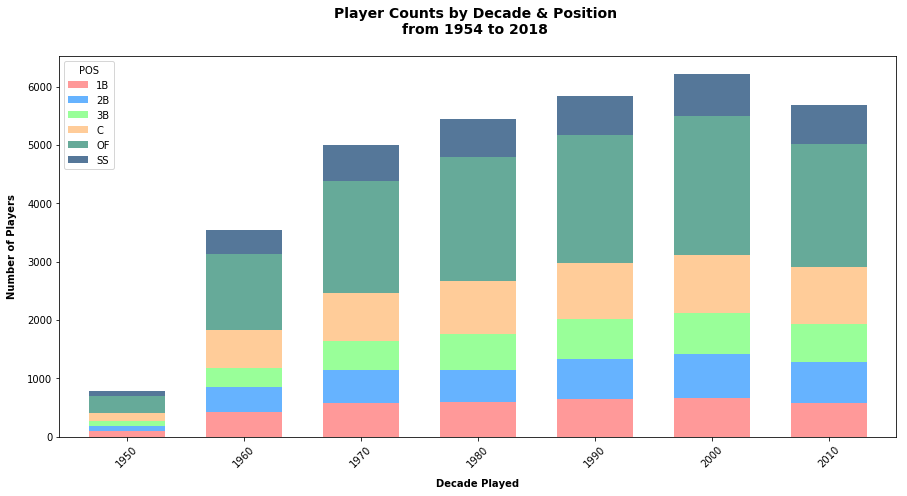

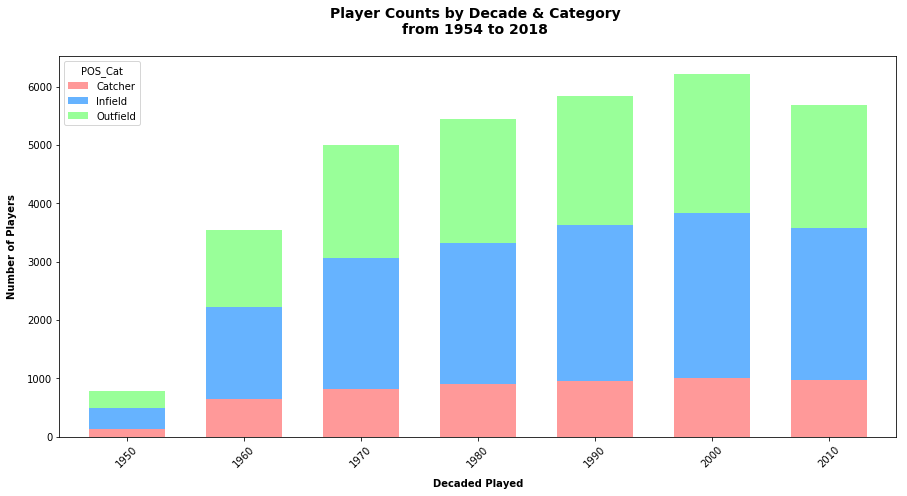

In [7]:
dfplot = df[['playerID','age']].groupby('age').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['Age','Age Counts']
ax = dfplot.plot(kind='bar',x='Age',y='Age Counts', color='#86bf91',width=0.55,figsize=(15,7))
ax.set_title('Player Counts by Age\nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Number of Playerse", labelpad=10, weight='bold', size=10)
ax.get_legend().remove()
plt.show()
print('\n\n')

dfplot = df[['playerID','years_played']].drop_duplicates().groupby('years_played').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['YearsPlayed','YearCounts']
ax = dfplot.plot(kind='bar',x='YearsPlayed',y='YearCounts',color='#86bf91',width=0.55,figsize=(15,7))
ax.set_title('Player Counts by Years Played \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Years Played", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Number of Players", labelpad=10, weight='bold', size=10)
ax.get_legend().remove()
plt.show()
print('\n\n')

dfplot = df[['decade','playerID']].groupby('decade').count()
dfplot = dfplot.reset_index()
dfplot.columns = ['Decade','Player Counts']
ax = dfplot.plot(kind='bar',x='Decade',y='Player Counts',figsize=(15,7),width=0.65,color='#86bf91')
ax.set_title('Player Counts by Decade \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decade Played", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Number of Players", labelpad=10, weight='bold', size=10)
ax.get_legend().remove()
plt.xticks(rotation=45)
plt.show()
print('\n\n')

dfplot = df[['decade','POS','playerID']].groupby(['decade','POS']).count()
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
ax = dfplot.plot(kind='bar',stacked=True,figsize=(15,7),width=0.65,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('Player Counts by Decade & Position \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decade Played", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Number of Players", labelpad=10, weight='bold', size=10)
plt.xticks(rotation=45)
plt.show()
print('\n\n')

dfplot = df[['decade','POS_Cat','playerID']].groupby(['decade','POS_Cat']).count()
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS_Cat = None
ax = dfplot.plot(kind='bar',stacked=True,figsize=(15,7),width=0.65,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('Player Counts by Decade & Category \nfrom 1954 to 2018 \n', weight='bold', size=14)
ax.set_xlabel("Decaded Played", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Number of Players", labelpad=10, weight='bold', size=10)
plt.xticks(rotation=45)
plt.show()
print('\n\n')

The next stop in our journey is to look at some scatter plots to see if there are any trends with the OPS data.  The purpose of the first scatter plot is to determine if there are any outliers in the data which was found to be true.  There were outlier OPS numbers greater than 1.5.  I excluded them going foward in the remaining scatter plots.

The next set of scatter plots looks at OPS vs. Age and OPS vs. Years Played.  One visualization is a "High Performer" scatter plot looking at players who have at least 12 years under their belts and at least an average of 300 at bats per year during their 12 years.  The next scatter plat looks at years played vs. OPS and the final plot looks only at catcher data.

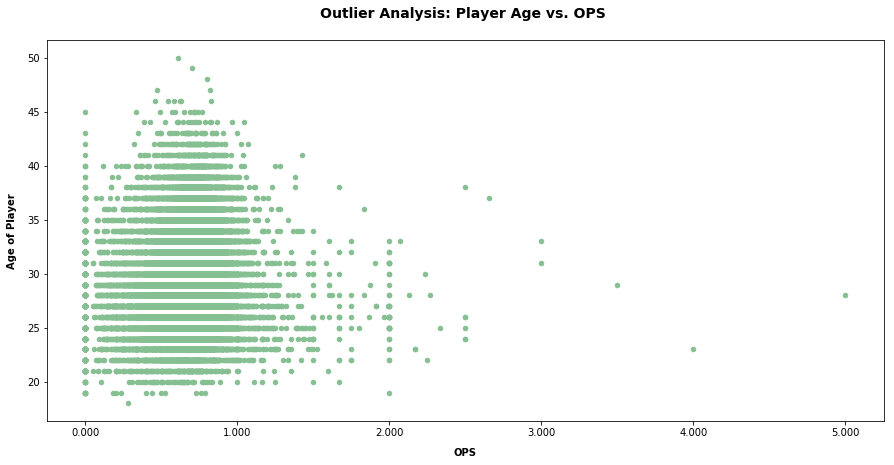

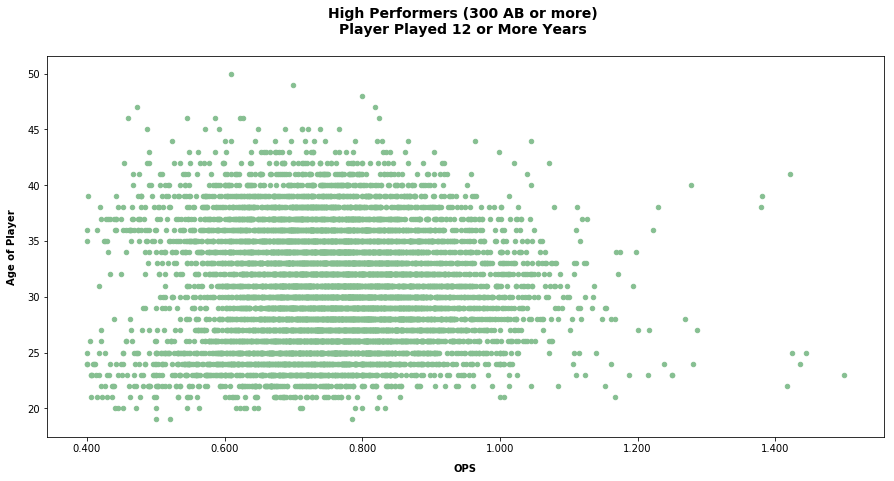

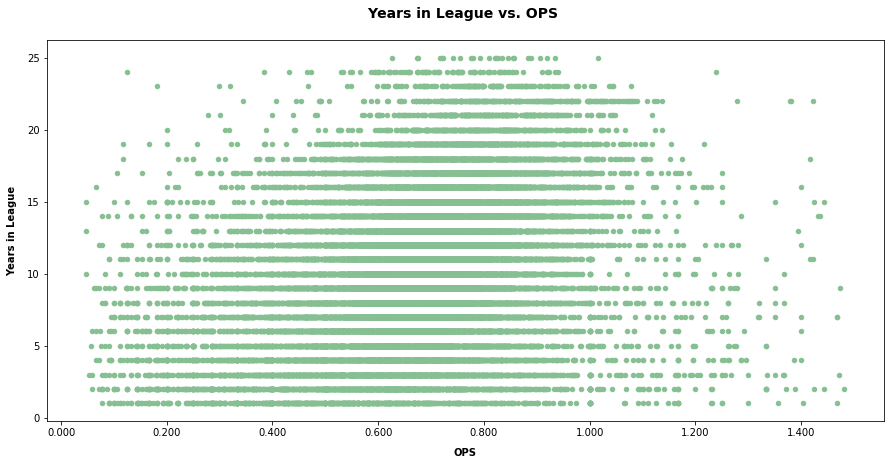

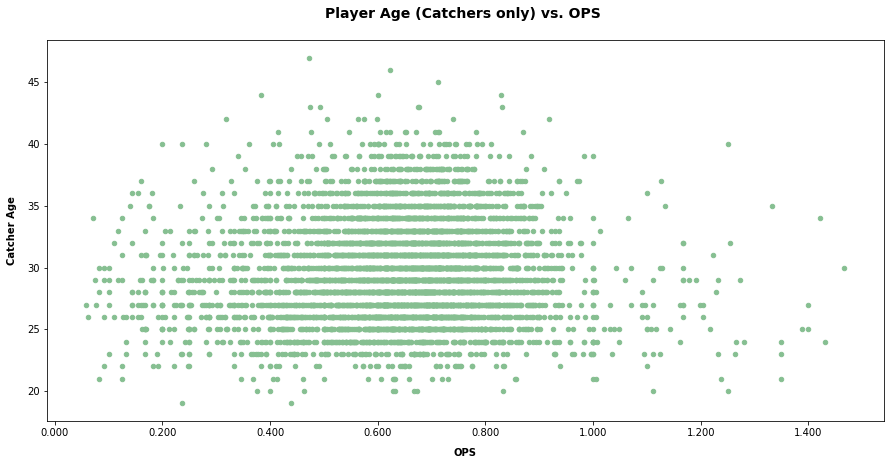

In [8]:

dfplot = df[['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(15,7),color='#86bf91')
ax.set_title('Outlier Analysis: Player Age vs. OPS \n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Age of Player", labelpad=10, weight='bold', size=10)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

dfplot = df[(df['years_played'] >= 12) & (df['OPS'] >= .4) & (df['OPS'] <= 1.5) & (df['avg_yrly_AB'] > 300)][['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(15,7),color='#86bf91')
ax.set_title('High Performers (300 AB or more) \nPlayer Played 12 or More Years \n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Age of Player", labelpad=10, weight='bold', size=10)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

dfplot = df[(df['OPS'] < 1.5) & (df['OPS'] > 0)][['OPS','years_played']]
ax = dfplot.plot(kind='scatter', x='OPS',y='years_played',figsize=(15,7),color='#86bf91')
ax.set_title('Years in League vs. OPS \n', weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Years in League", labelpad=10, weight='bold', size=10)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()
print('\n\n')

dfplot = df[df['POS'] == 'C']
dfplot = dfplot[(dfplot['OPS'] < 1.5) & (dfplot['OPS'] > .0)][['OPS','age']]
ax = dfplot.plot(kind='scatter', x='OPS',y='age',figsize=(15,7),color='#86bf91')
ax.set_title('Player Age (Catchers only) vs. OPS \n',weight='bold', size=14)
ax.set_xlabel("OPS", labelpad=10, weight='bold', size=10)
ax.set_ylabel("Catcher Age", labelpad=10, weight='bold', size=10)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()


The next two visualizations look at OPS over time from 1954 to 2018.  The first visualization looks at OPS by year by position (1B, 2B, 3B, SS, C and Outfield).  The second visual looks at OPS by year by position category (Outfield, Infield, Catcher)

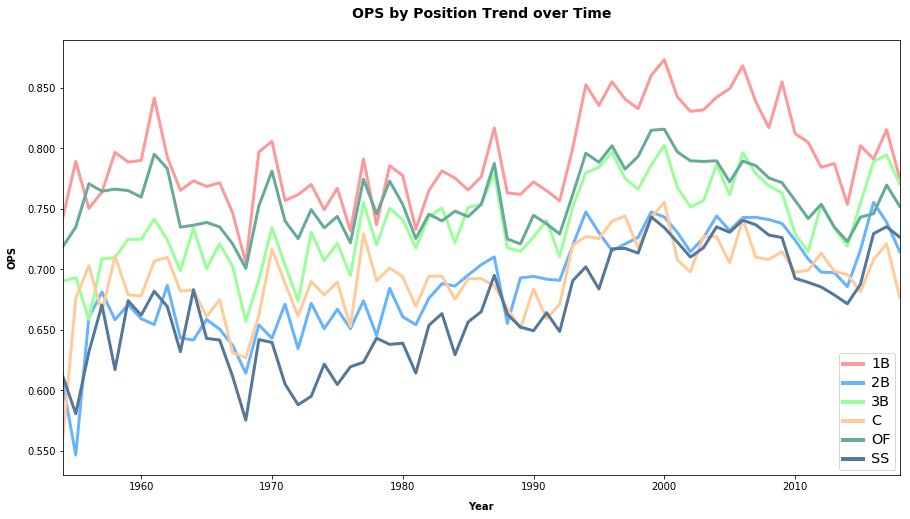

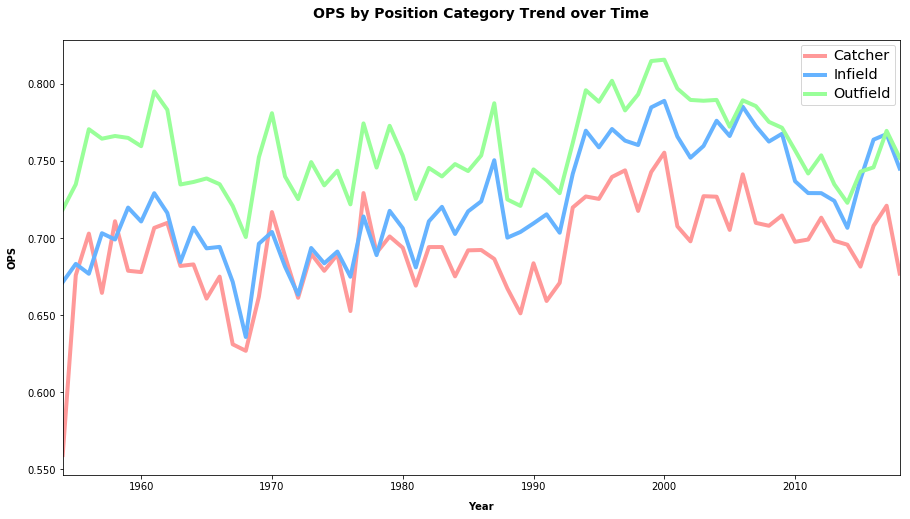

In [9]:
dfplot = df[['yearID','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['yearID','POS']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='yearID',figsize=(15,8),linewidth=3,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('OPS by Position Trend over Time\n',weight='bold', size=14)
ax.set_xlabel("Year", labelpad=10, weight='bold', size=10)
ax.set_ylabel("OPS", labelpad=10, weight='bold', size=10)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()
#print(dfplot)

dfplot = df[['yearID','POS_Cat','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['yearID','POS_Cat']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='yearID',figsize=(15,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('OPS by Position Category Trend over Time\n',weight='bold', size=14)
ax.set_xlabel("Year", labelpad=10, weight='bold', size=10)
ax.set_ylabel("OPS", labelpad=10, weight='bold', size=10)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

The last set of visualizations are line plots which look at summarizations of OPS by position and by position category as compared to the age of the player.  Only players with at least 12 years of experience and were between 20 and 40 years of age. Positions are 1B, 2B, 3B, SS, Catch and Outfielder.  Position categories are Infielder, Outfielder and Catcher.  The final visualization shows OPS vs Age summarized to represent all players with at least 12 years of experience and were between 20 and 40 years of age. 

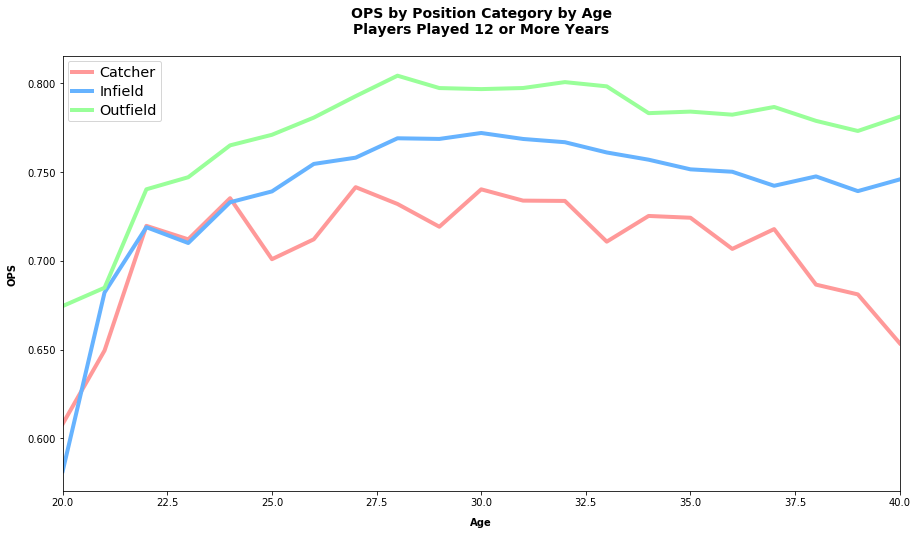

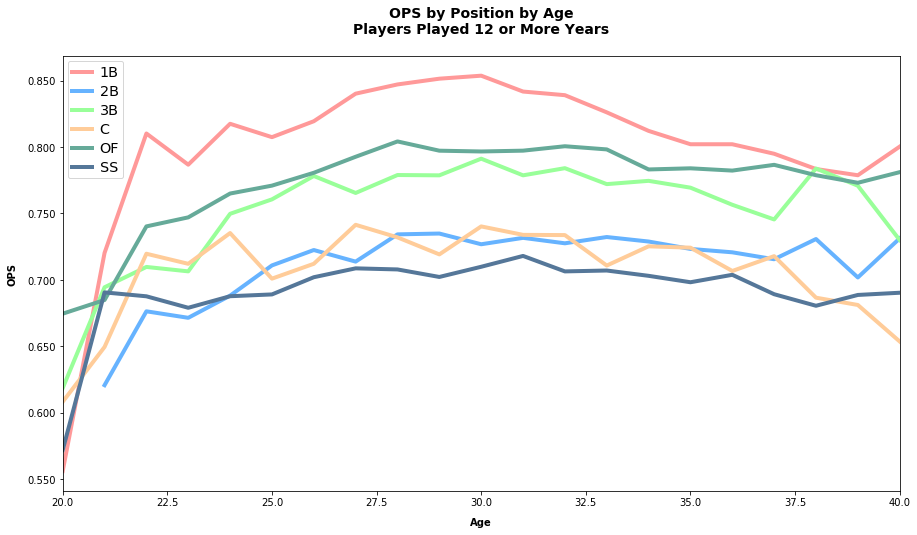

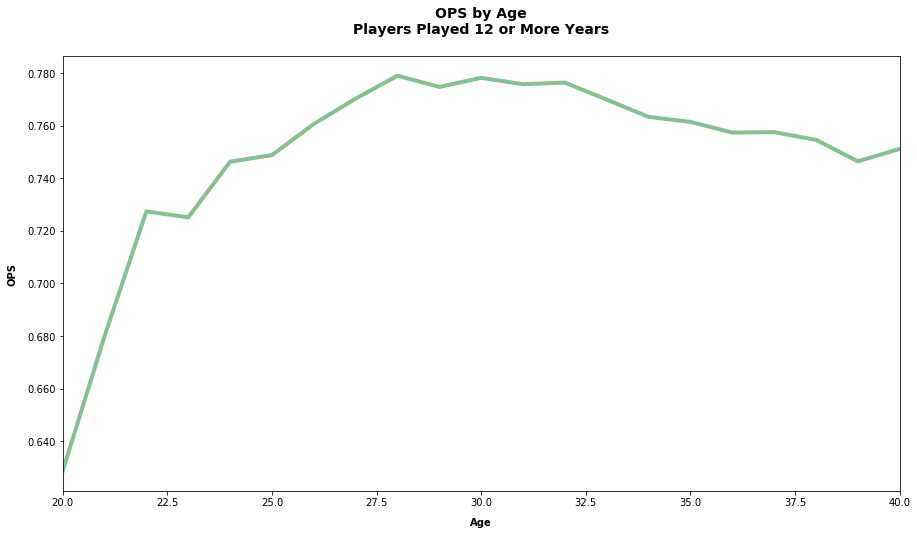

In [10]:
# plot players played 12 or more years against OPS by Position Category
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 20)][['age','POS_Cat','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age','POS_Cat']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99'])
ax.set_title('OPS by Position Category by Age\nPlayers Played 12 or More Years\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, weight='bold', size=10)
ax.set_ylabel("OPS", labelpad=10, weight='bold', size=10)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large') 
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

# plot players played 12 or more years against OPS by Position
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 20)][['age','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age','POS']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.unstack()
dfplot.columns = dfplot.columns.droplevel()
dfplot.columns.POS = None
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color=['#ff9999','#66b3ff','#99ff99','#ffcc99','#66aa99','#557799'])
ax.set_title('OPS by Position by Age\nPlayers Played 12 or More Years\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, weight='bold', size=10)
ax.set_ylabel("OPS", labelpad=10, weight='bold', size=10)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
plt.show()

# plot players played 12 or more years against OPS by Position
dfplot = df[(df['years_played'] >= 12) & (df['age'] <= 40) & (df['age'] >= 20)][['age','POS','H','BB','HBP','AB','SF','1B','2B','3B','HR']]
dfplot = dfplot.groupby(['age']).sum()
dfplot = calc_ops(dfplot)
dfplot = dfplot[['OPS']]
dfplot = dfplot.reset_index()
ax = dfplot.plot(kind='line',x='age',figsize=(15,8),linewidth=4,color='#86bf91')
ax.set_title('OPS by Age\nPlayers Played 12 or More Years\n',weight='bold', size=14)
ax.set_xlabel("Age", labelpad=10, weight='bold', size=10)
ax.set_ylabel("OPS", labelpad=10, weight='bold', size=10)
leg = plt.legend()
# get the individual lines inside legend and set line width
for line in leg.get_lines():
    line.set_linewidth(4)
# get label texts inside legend and set font size
for text in leg.get_texts():
    text.set_fontsize('x-large')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:1.3f}'))
ax.get_legend().remove()
plt.show()
